In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def lj(x, eps=1, sigma=1):
    """
    computes energy for a lennard jones potential
    """
    scaled_r = sigma/x
    return 4.0*eps*(scaled_r**12 - scaled_r**6)

In [7]:
eps = 1
sig = 1
x = np.linspace(0.98, 3, 100)

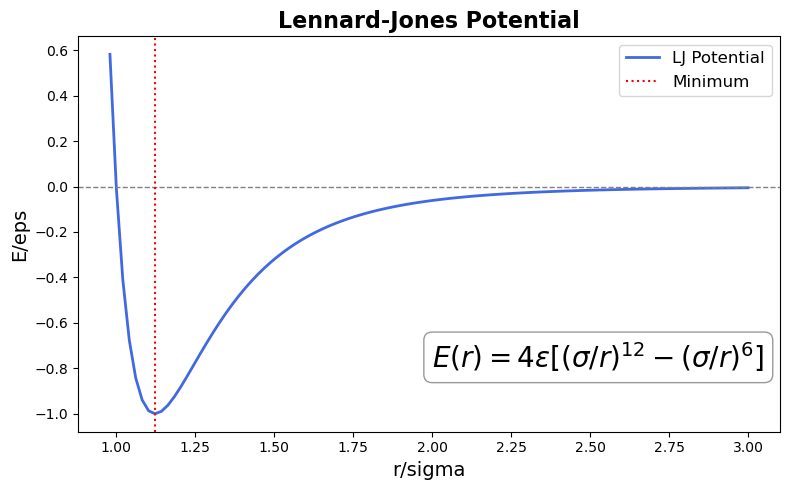

In [8]:
plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(8, 5))
plt.title("Lennard-Jones Potential", fontsize=16, fontweight='bold')
plt.plot(x, lj(x, sigma=sig, eps=eps)/eps, color='royalblue', linewidth=2, label='LJ Potential')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(2**(1/6)*sig, color='red', linestyle=':', linewidth=1.5, label='Minimum')
plt.ylabel("E/eps", fontsize=14)
plt.xlabel("r/sigma", fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.annotate(
    "$E(r) = 4\\epsilon[(\\sigma/r)^{12} - (\\sigma/r)^6]$",
    xy=(2., -0.8), xycoords='data',
    fontsize=20, color='black',
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
)
plt.savefig("lennard_jones_potential.png", dpi=300)

In [ ]:
from ipywidgets import interact, IntSlider, FloatSlider, Checkbox

def interactive_lj_plot(num_samples=10, noise=0.0, prior=False):
    x_sampled = np.linspace(1.0, 1.8, num_samples)
    y_sampled = lj(x_sampled, sigma=sig, eps=eps) + noise * np.random.randn(len(x_sampled))

    plt.style.use('seaborn-v0_8-dark-palette')
    plt.figure(figsize=(8, 5))
    plt.title("Lennard-Jones Potential", fontsize=16, fontweight='bold')
    plt.plot(x, lj(x, sigma=sig, eps=eps)/eps, color='royalblue', linewidth=2, label='LJ Potential - ground truth')
    plt.ylabel("E/eps", fontsize=14)
    plt.xlabel("r/sigma", fontsize=14)

    plt.tight_layout()
    plt.scatter(x_sampled, y_sampled/eps, color='darkorange', s=100, edgecolor='k', zorder=5, label='Sampled Points')
    plt.ylim(-1.1, 0.6)
    plt.xlim(0.98, 2.2)
    
    for deg in [1, 4, 8, 12]:
        if prior:
            coeffs = np.polyfit(1/x_sampled, y_sampled, deg=deg)
            poly_fit = np.poly1d(coeffs)
            y_fit = poly_fit(1/x)
        else:
            coeffs = np.polyfit(x_sampled, y_sampled, deg=deg)
            poly_fit = np.poly1d(coeffs)
            y_fit = poly_fit(x)

        plt.plot(x, y_fit, linestyle='--', linewidth=2, label=f'{deg} Degree Poly Fit')

    plt.legend(fontsize=12)
    plt.show()

interact(
    interactive_lj_plot,
    num_samples=IntSlider(min=5, max=50, step=1, value=10, description='Samples'),
    noise=FloatSlider(min=0.0, max=0.2, step=0.01, value=0.0, description='Noise'),
    prior=Checkbox(value=False, description='Use Prior')
)


interactive(children=(IntSlider(value=10, description='Samples', max=50, min=5), FloatSlider(value=0.0, descri…

<function __main__.interactive_lj_plot(num_samples=10, noise=0.0, prior=False)>